# Kaggle House Prediction 

In [1]:
import pandas as pd
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [2]:
df3=pd.concat([df1,df2])
intcol=df3.select_dtypes(include=['int64','float64'])
catcol=df3.select_dtypes(include=object)

## Transformation

In [3]:
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

skew=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF']
for col in skew:
    df3[col]=df3[col]**.5
df3.YearBuilt=np.log(df3.YearBuilt)
col=intcol.columns
col1=catcol.columns

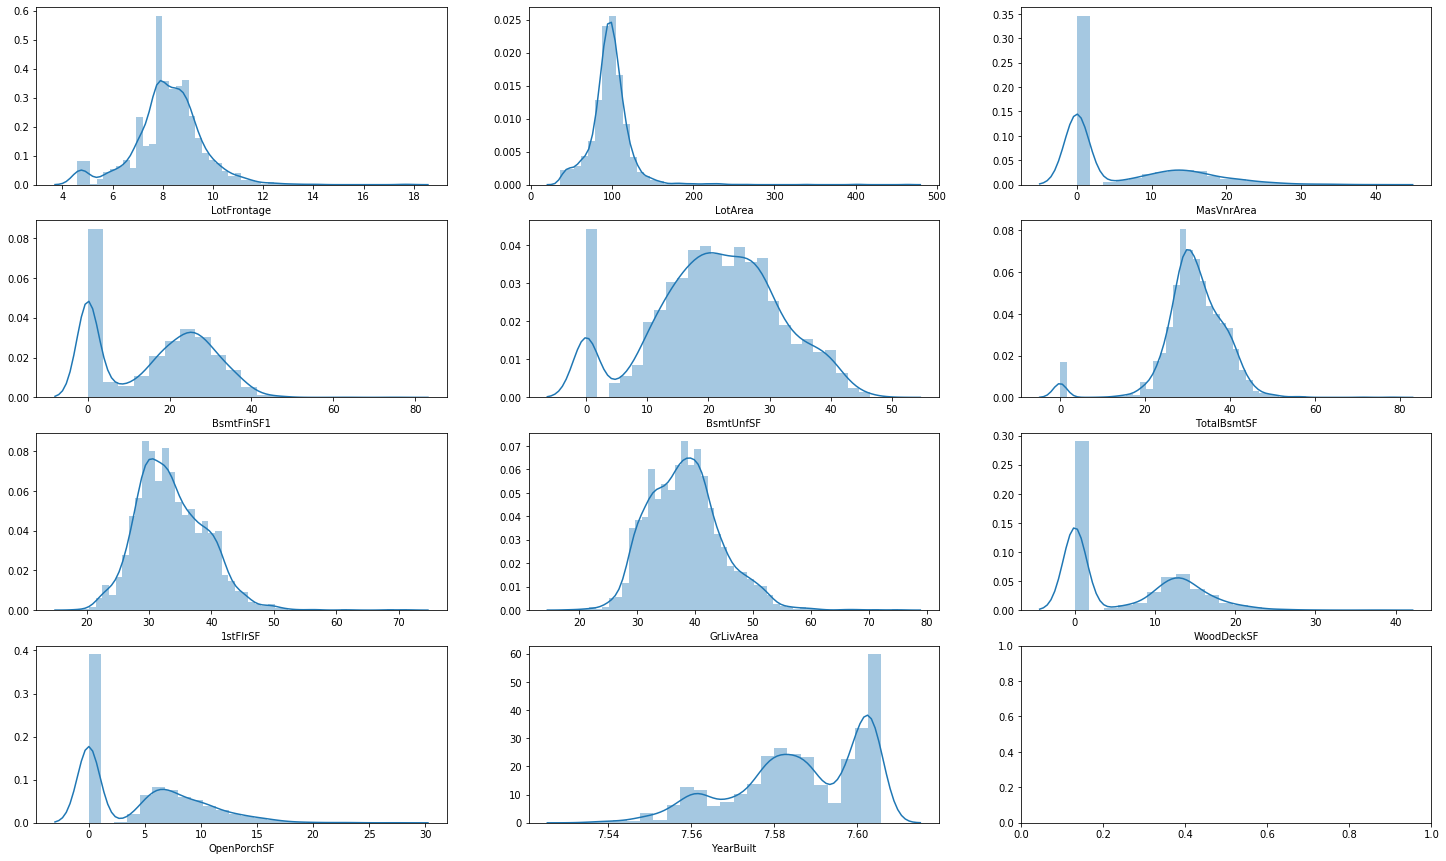

In [4]:
fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(25,15))
sns.distplot(df3[skew[0]],ax=ax[0][0])
sns.distplot(df3[skew[1]],ax=ax[0][1])
sns.distplot(df3[skew[2]],ax=ax[0][2])
sns.distplot(df3[skew[3]],ax=ax[1][0])
sns.distplot(df3[skew[4]],ax=ax[1][1])
sns.distplot(df3[skew[5]],ax=ax[1][2])
sns.distplot(df3[skew[6]],ax=ax[2][0])
sns.distplot(df3[skew[7]],ax=ax[2][1])
sns.distplot(df3[skew[8]],ax=ax[2][2])
sns.distplot(df3[skew[9]],ax=ax[3][0])
sns.distplot(df3.YearBuilt,ax=ax[3][1])

1. Even though Sqrt transformed still many outliers visible. Later will cap those outliers.
2. YearBuilt is tough to transform.

## Removal of outliers

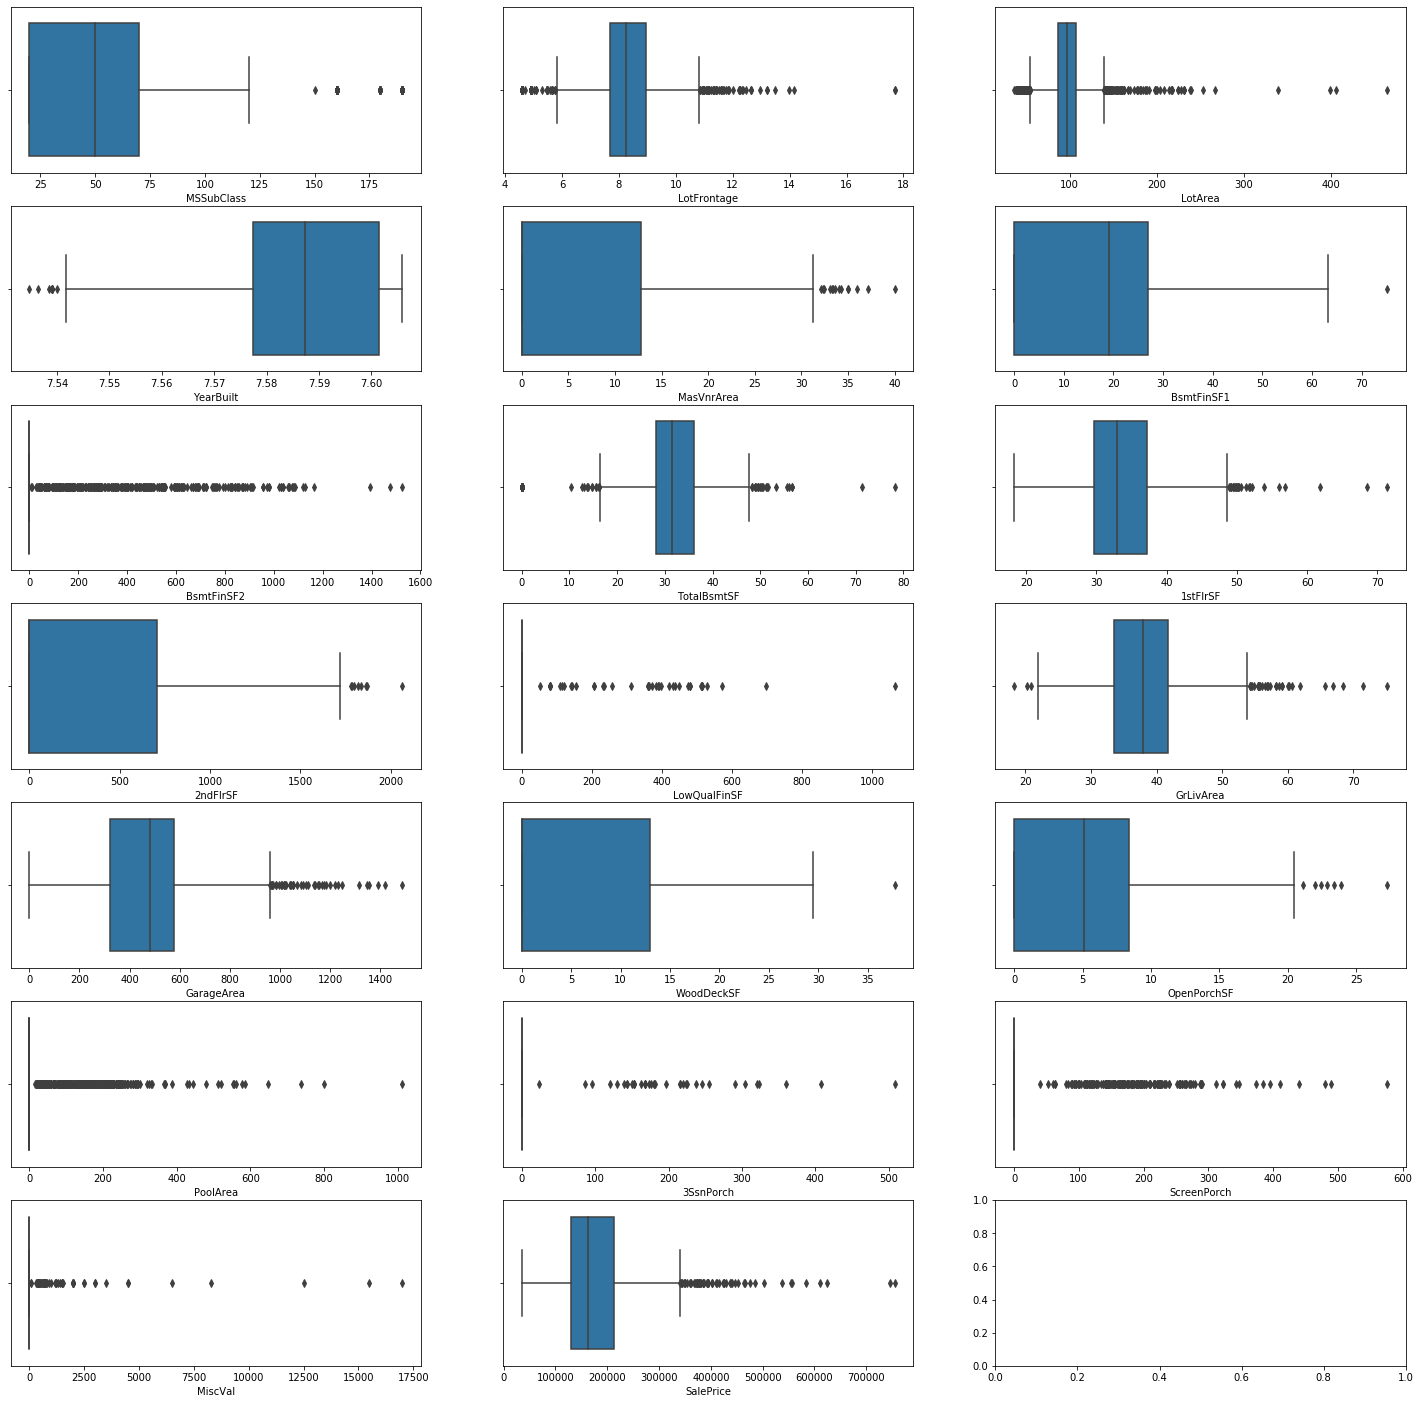

In [5]:
fig, ax = plt.subplots(nrows=7,ncols=3,figsize=(25,25))
sns.boxplot(df3[col[1]],ax=ax[0][0])
sns.boxplot(df3[col[2]],ax=ax[0][1])
sns.boxplot(df3[col[3]],ax=ax[0][2])
sns.boxplot(df3[col[6]],ax=ax[1][0])
sns.boxplot(df3[col[8]],ax=ax[1][1])
sns.boxplot(df3[col[9]],ax=ax[1][2])
sns.boxplot(df3[col[10]],ax=ax[2][0])
sns.boxplot(df3[col[12]],ax=ax[2][1])
sns.boxplot(df3[col[13]],ax=ax[2][2])
sns.boxplot(df3[col[14]],ax=ax[3][0])
sns.boxplot(df3[col[15]],ax=ax[3][1])
sns.boxplot(df3[col[16]],ax=ax[3][2])
sns.boxplot(df3[col[27]],ax=ax[4][0])
sns.boxplot(df3[col[28]],ax=ax[4][1])
sns.boxplot(df3[col[29]],ax=ax[4][2])
sns.boxplot(df3[col[30]],ax=ax[5][0])
sns.boxplot(df3[col[31]],ax=ax[5][1])
sns.boxplot(df3[col[32]],ax=ax[5][2])
sns.boxplot(df3[col[33]],ax=ax[5][0])
sns.boxplot(df3[col[34]],ax=ax[6][0])
sns.boxplot(df3[col[37]],ax=ax[6][1])

1. MSSubClass is a kind of integer categorical variable so not going to cap it.
2. Also as SalePrice is the target we are not going to modify it.

In [6]:
#Will cap the ouliers at 1% and 90% of max value 
for i in (2,3,6,8,12,13,14,16,27,29,28,30):
    l=(df3[col[i]].quantile(0.10))
    h=(df3[col[i]].quantile(0.90))
    df3[col[i]]=np.where(df3[col[i]]<l,l,df3[col[i]])
    df3[col[i]]=np.where(df3[col[i]]>h,h,df3[col[i]])

## Handling Nan  

In [7]:
#These are the features containg Nan
df3.isnull().sum()[df3.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
df4=df3[df3['LotFrontage'].notna()]
x=np.array(df4.LotArea).reshape((-1,1))
model=LinearRegression().fit(x,df4.LotFrontage)
df4=df3[df3['LotFrontage'].isna()]
pred=np.array(df4.LotArea).reshape((-1,1))
y=model.predict(pred)
df4.LotFrontage=y
for i in df4.index:
    df3.LotFrontage[i]=df4.LotFrontage[i]

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-8-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-8-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFro

<ipython-input-8-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-8-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-8-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-8-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to b

Few categorical columns have Nan which represents Not Present

In [9]:
for col in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    df3[col]=df3[col].fillna('NotThere')


Few continuous columns have Nan which means it is Not Present

In [10]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    df3[col]=df3[col].fillna(0)

Few categorical columns have Nan which represents Not Availbale

In [11]:
for col in ('MSZoning','Exterior1st','Exterior2nd','GarageCars','KitchenQual','SaleType','Functional'):
    df3[col]=df3[col].fillna(df3[col].mode()[0])

## Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in col1:
    df3[col]=LabelEncoder().fit_transform(df3[col])

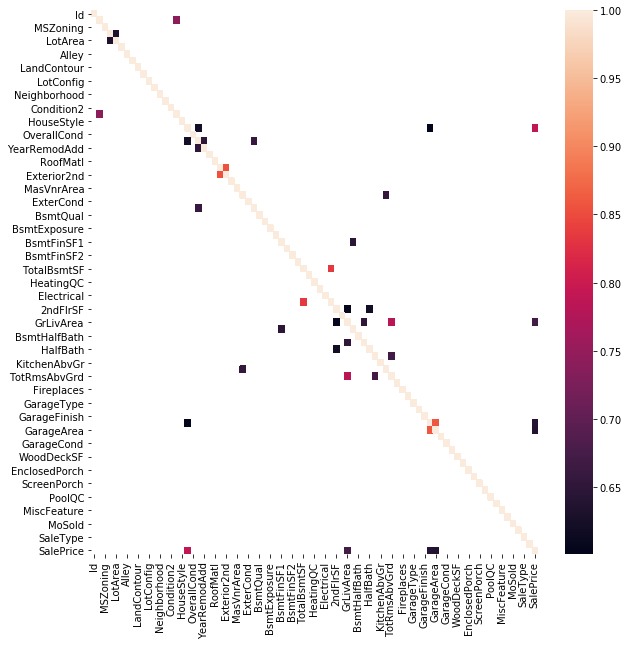

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr()[df3.corr()>0.6])

Highly correlated variables:
1. LotArea and LotFrontage
2. FullBath and GrLivArea
3. OverallQual and YearBuilt
4. BsmtFullBath and BsmtFinSF1

and the features told previously...

will see later about GarageCars and OverallQual

In [14]:
df3.corr().SalePrice.sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.672189
GarageCars      0.640409
GarageArea      0.636913
TotalBsmtSF     0.598773
1stFlrSF        0.574461
FullBath        0.560664
YearBuilt       0.542936
TotRmsAbvGrd    0.533723
YearRemodAdd    0.507101
Fireplaces      0.466929
LotArea         0.438691
OpenPorchSF     0.427591
MasVnrArea      0.418573
Foundation      0.382479
WoodDeckSF      0.334711
LotFrontage     0.322814
BsmtFinSF1      0.293820
HalfBath        0.284108
Name: SalePrice, dtype: float64

Among the above mentioned highly correlated features going to dropping the ones which contribute less towards target variable 

In [15]:
df3.drop(['Id','GarageArea','BsmtFullBath','GarageYrBlt','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','BedroomAbvGr','LotArea','FullBath','YearBuilt'],axis=1,inplace=True)

## New feature

In [16]:
df3.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSol

In [17]:
df3['HighPrice']=((df3.MSSubClass==60)*1)+((df3.GarageCars==3)*1)+((df3.OpenPorchSF>70*1)*(df3.OpenPorchSF<100*1))+((df3.MoSold==7)*1)

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [18]:
df3['Overall']=df3.OverallQual + df3.OverallCond
df3['Exter']=df3.ExterCond+df3.ExterQual
df3['Bsmt']=df3.BsmtQual+df3.BsmtCond
df3['Garage']=df3.GarageQual+df3.GarageCond
df3.drop(['OverallQual','OverallCond','ExterCond','ExterQual','BsmtQual','BsmtCond','GarageQual','GarageCond'],axis=1,inplace=True)

## Scaling

In [19]:
from sklearn.preprocessing import RobustScaler
df3_col=df3.columns
df3=pd.DataFrame(RobustScaler().fit_transform(df3))
df3.columns=df3_col

In [20]:
df3

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HighPrice,Overall,Exter,Bsmt,Garage
0,0.2,0.0,-0.253977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.00,0.0,0.0,0.0,0.541506,1.0,0.0,-1.0,0.0,0.0
1,-0.6,0.0,0.482074,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,-0.25,-0.5,0.0,0.0,0.220173,0.0,1.0,0.0,0.0,0.0
2,0.2,0.0,-0.100466,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.75,0.0,0.0,0.0,0.720024,1.0,0.0,-1.0,0.0,0.0
3,0.4,0.0,-0.517926,0.0,0.0,-1.0,0.0,0.0,-2.0,0.0,...,-1.00,-1.0,0.0,-4.0,-0.273728,1.0,0.0,0.0,-0.5,0.0
4,0.2,0.0,0.666400,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,1.50,0.0,0.0,0.0,1.035406,2.0,0.5,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.2,1.0,-1.509767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,-1.0,0.0,0.0,NaN,0.0,-0.5,0.0,1.0,-4.0
2915,2.2,1.0,-1.509767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.50,-1.0,0.0,-4.0,NaN,0.0,-1.5,0.0,1.0,0.0
2916,-0.6,0.0,1.151788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,-1.0,0.0,-4.0,NaN,0.0,0.0,0.0,1.0,0.0
2917,0.7,0.0,-0.411074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,-1.0,0.0,0.0,NaN,1.0,-1.0,0.0,0.0,-4.0


## Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
train=df3[df3['SalePrice'].notna()]
test=df3[df3['SalePrice'].isna()]
train_x,valid_x,train_y,valid_y=train_test_split(train.drop('SalePrice',axis=1),df1.SalePrice)
print(np.mean(df1.SalePrice))

180921.19589041095


### 1.Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
print(np.mean(cross_val_score(LR,train_x,train_y,scoring='neg_mean_absolute_error')))

-22266.675953262187


### 2.Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0) 
print(np.mean(cross_val_score(RFR,train_x,train_y,scoring='neg_mean_absolute_error')))

-18215.649050228312


### 3.XGBoost

In [24]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=5)
print(np.mean(cross_val_score(XGBR,train_x,train_y,scoring='neg_mean_absolute_error')))

-17082.707159674657


### 4.SVM

In [25]:
from sklearn.svm import SVR
SVMR= SVR(kernel = 'rbf')
print(np.mean(cross_val_score(SVMR,train_x,train_y,scoring='neg_mean_absolute_error')))

-55293.45352533578


### 5.KNN

In [26]:
from sklearn import neighbors
for K in range(20):
    K = K+1
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K)
    KNN.fit(train_x, train_y)
    pred=KNN.predict(valid_x)
    error = (mean_squared_error(valid_y,pred))
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4983038526.550685
RMSE value for k=  2 is: 3757151174.100685
RMSE value for k=  3 is: 3800092068.1318107
RMSE value for k=  4 is: 3691964396.7260275
RMSE value for k=  5 is: 3604592138.1624103
RMSE value for k=  6 is: 3554364839.714536
RMSE value for k=  7 is: 3535508784.6202965
RMSE value for k=  8 is: 3548607960.0096745
RMSE value for k=  9 is: 3550530152.126873
RMSE value for k=  10 is: 3536245115.9341097
RMSE value for k=  11 is: 3505211958.6365447
RMSE value for k=  12 is: 3463933496.3397837
RMSE value for k=  13 is: 3482408202.7925105
RMSE value for k=  14 is: 3482361874.850657
RMSE value for k=  15 is: 3502002711.92386
RMSE value for k=  16 is: 3470687536.7355413
RMSE value for k=  17 is: 3460640099.670844
RMSE value for k=  18 is: 3442299710.345924
RMSE value for k=  19 is: 3456474594.777171
RMSE value for k=  20 is: 3450551016.73811


Error comes out to be less for K=18

In [30]:
KNN = neighbors.KNeighborsRegressor(n_neighbors = 18)
print(np.mean(cross_val_score(KNN,train_x,train_y,scoring='neg_mean_absolute_error')))

-31648.799492643324


### 6.Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures 
for x in range(3):  
    x=x+1
    poly= PolynomialFeatures(degree = x) 
    X_poly = poly.fit_transform(train_x) 
    PLR=LinearRegression()
    PLR.fit(X_poly, train_y) 
    X_poly = poly.transform(valid_x)
    pred=PLR.predict(X_poly) 
    print('RMSE value for x= ' , x , 'is:', (mean_squared_error(valid_y,pred)))


RMSE value for x=  1 is: 1404930051.0055141
RMSE value for x=  2 is: 14246388774.175568
RMSE value for x=  3 is: 202949951108.85806


### 7.Lasso

In [31]:
from sklearn.linear_model import Lasso
LSR= Lasso(alpha=1.0,normalize=True, max_iter=1e5)
print(np.mean(cross_val_score(LSR,train_x,train_y,scoring='neg_mean_absolute_error')))

-22183.402991311625
